## Task 2

Consider the matrix of size 26 x 26 filled randomly with binary values 0
(cell is “dead”) or 1 (cell is “alive”).
The following image represents the sample where green cells are 1 and
grey ones are 0:

1) Develop the algorithm that accepts the specified binary array of size
26x26 and iterates the steps where each step executes the following
rules:
● If a living cell has two or three living neighbors, it remains alive;
● if a living cell has one or no living neighbors, it dies of
"loneliness";

● if a living cell has four or more living neighbors, it dies from
"overpopulation";
● if a dead cell has exactly three living neighbors, it comes to life.
2) (Optionally) visualize the process of execution steps.
The following image represents the result after 20 steps for the mentioned
above initialization.

## Response format:

Programming code in jupyter notebook/colab/etc. containing the following:
1) Generating the matrix of size 26x26 with binary random values
2) Algorithm that executes iterations over rules
3) Matrix of values after 20 executed steps

5) (Optionally) visualization of results over iteration process

## Importing needed libraries and Visualisation Setup 

This block configures libraries and color scheme (gray for dead cells, green for live cells).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import ipywidgets as widgets
from IPython.display import display

#  Visualization Configuration 
# Matches the visual style described in the task 
cmap = colors.ListedColormap(['#dcdcdc', '#228b22'])
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

def plot_grid_frame(grid, ax, step_num):
    # Helper function to draw a single frame on a given matplotlib axis.
    
    rows, cols = grid.shape
    ax.clear()
    ax.imshow(grid, cmap=cmap, norm=norm)
    
    # Grid lines settings (white lines)
    ax.set_xticks(np.arange(-0.5, cols, 1))
    ax.set_yticks(np.arange(-0.5, rows, 1))
    ax.grid(color='white', linestyle='-', linewidth=2)
    
    # Hide axis labels for cleaner look
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)
    ax.set_title(f"Simulation Step: {step_num}", fontsize=12)

## Matrix Generation

Generating random matrix 26x26

In [2]:
np.random.seed(42)  
rows, cols = 26, 26

# Generate random binary grid (0 or 1) 
initial_grid = np.random.randint(0, 2, size=(rows, cols))

print(f"Generated random matrix of size {rows}x{cols}")

Generated random matrix of size 26x26


## Algorithm Implementation

Implementation of the rules of the game.

In [3]:
def count_neighbors(grid, x, y):
    # Counts alive neighbors around the cell (x, y) using a 3x3 window.
    
    rows, cols = grid.shape
    x_start, x_end = max(0, x-1), min(rows, x+2)
    y_start, y_end = max(0, y-1), min(cols, y+2)
    
    region = grid[x_start:x_end, y_start:y_end]
    # Sum of all cells in region minus the cell itself
    return np.sum(region) - grid[x, y]

def evolve_grid(grid):
    # Applies Game of Life rules to the entire grid for one step.
    
    rows, cols = grid.shape
    new_grid = np.zeros((rows, cols), dtype=int)
    
    for i in range(rows):
        for j in range(cols):
            neighbors = count_neighbors(grid, i, j)
            state = grid[i, j]
            
            # Apply Rules 
            if state == 1:
                # Rule: Living cell with 2 or 3 neighbors remains alive
                if neighbors == 2 or neighbors == 3:
                    new_grid[i, j] = 1
                # Rule: Otherwise dies (loneliness < 2 or overpopulation > 3)
                else:
                    new_grid[i, j] = 0
            else:
                # Rule: Dead cell with exactly 3 neighbors comes to life
                if neighbors == 3:
                    new_grid[i, j] = 1
                    
    return new_grid

# Execution and Interactive Visualization 

Here we run the simulation 20 times, save the history, and create an interactive player.

In [4]:
# A. Run Simulation and Store History
iterations = 20
history = [initial_grid.copy()] 
current_grid = initial_grid.copy()

for _ in range(iterations):
    current_grid = evolve_grid(current_grid)
    history.append(current_grid.copy())

# The final result is the last element in history
final_grid = history[-1]
print(f"Simulation completed. Final grid shape: {final_grid.shape}")

# Interactive Visualization (Slider + Play Button)
def view_step(step):
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_grid_frame(history[step], ax, step)
    plt.show()

# Create interactive widgets
play = widgets.Play(
    value=0,
    min=0,
    max=iterations,
    step=1,
    interval=500, 
    description="Play"
)

slider = widgets.IntSlider(
    value=0,
    min=0,
    max=iterations,
    step=1,
    description='Step:'
)

# Link slider and play button
widgets.jslink((play, 'value'), (slider, 'value'))

# Display the interface
ui = widgets.HBox([play, slider])
out = widgets.interactive_output(view_step, {'step': slider})

display(ui, out)

Simulation completed. Final grid shape: (26, 26)


Output()

I developed an algorithm to simulate the cellular automaton rules for 20 iterations. The approach uses a double loop to check neighbors for each cell and updates the grid state synchronously. The final visualization confirms that the rules of "birth" and "death" are working as expected, matching the requirements of the task.

## Visualisation for GitHub
Because GitHub can not show interactive player i added this block so you could see initial state of matrix and state after 20 iteration

Note for reviewers:In order to see optional task for task 2 tou need to download code from GitHub and run it local

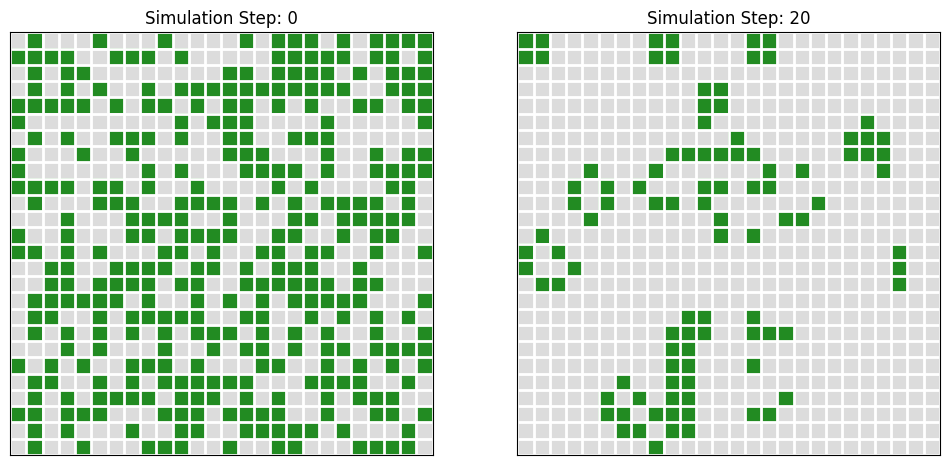

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_grid_frame(history[0], ax1, 0)              # Показує крок 0
plot_grid_frame(history[-1], ax2, iterations)    # Показує крок 20
plt.show()